## Author: Kenneth Pham



Math Example for Forward and Backward Propagation

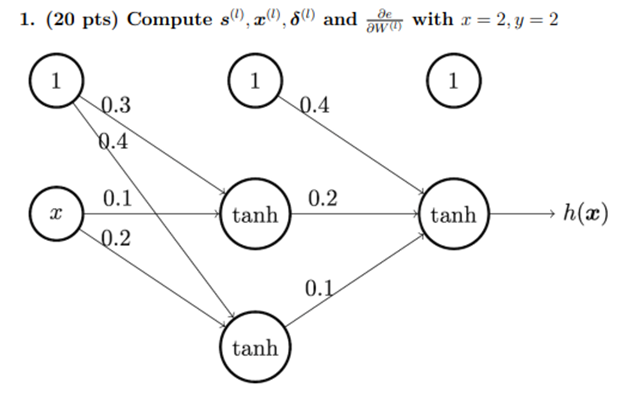

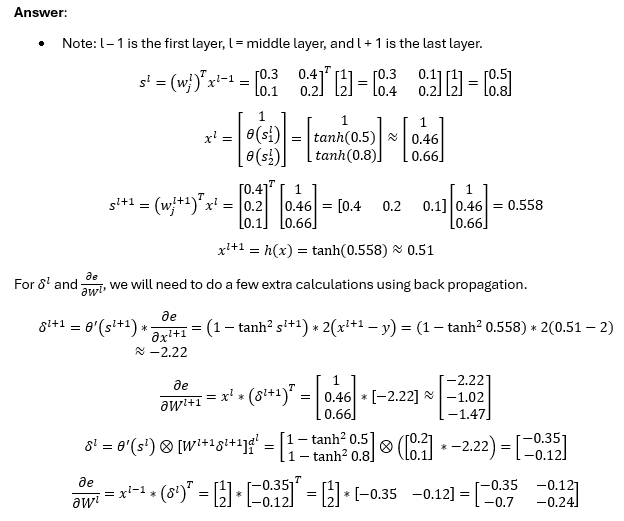

Implementing a Basic Algorithm to do Forward and Backward Propagation

In [ ]:
import numpy as np

def f_and_b_propagation_calc(f, w, y, l = 2):
  #set up x and s
  x = list()
  s = list()
  x.append(np.append(1, f))

  #forward propagation
  for i in range(l):
    s.append(np.dot(w[i].T, x[i]))
    if i != l - 1:
      x.append(np.append(1, np.tanh(s[i])))
      s[i] = s[i].reshape(len(s[i]), 1)
    else:
      x.append(np.tanh(s[i]).item())
  x[l - 1] = x[l - 1].reshape(-1, 1)

  #get first delta and de/dw for backward propogation
  delta = list()
  de = list()
  for i in range(l - 1):
    delta.append(np.array([0]))
    de.append(np.array([0]))
  delta.append(((1 - np.tanh(s[l - 1])**2) * 2  * (x[l] - y)))
  delta[l - 1] = delta[l - 1].reshape(-1, 1)
  de.append(np.dot(x[l - 1], delta[l - 1].T))

  #backward propagation
  for i in range(l - 2, -1, -1):
    delta[i] = np.multiply((1 - np.tanh(s[i])**2), np.dot(w[i + 1][1:], delta[i + 1]))
    x[i] = x[i].reshape(-1, 1)
    delta[i] = delta[i].reshape(-1, 1)
    de[i] = np.dot(x[i], delta[i].T)

  return de, x[l]

def test():
  w = list()
  w.append(np.array([[0.3, 0.4], [0.1, 0.2]]))
  w.append(np.array([[0.4], [0.2], [0.1]]))
  de, x = f_and_b_propagation_calc(np.array([2]), w, 2)
  print(de)
  print(x)

test()

[array([[-0.34886352, -0.12399677],
       [-0.69772704, -0.24799354]]), array([[-2.21797017],
       [-1.02496207],
       [-1.47281375]])]
0.5071066771634625


Implementing Stochastic Gradient Descent with the Forward and Backware Propagation Algorithm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


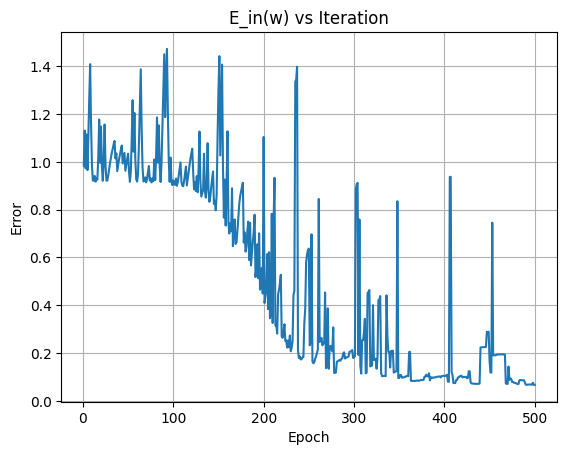

In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

def calc_sym(img_matrix):
  flipped = np.fliplr(img_matrix)
  diff = np.abs(img_matrix - flipped)
  return 1 - np.mean(diff)

def data_processing(x, y, clr, file_path, targets):
  f = open(file_path, "r")
  nums = f.read().split()
  for i in range(len(nums)):
    nums[i] = float(nums[i])
  i = 0
  x = np.empty((0, 2), float)
  y = np.empty((0), int)
  clr = np.empty((0), str)
  while i < len(nums):
    if nums[i] == targets[0] or nums[i] == targets[1]:
      if nums[i] == targets[0]:
        y = np.append(y, np.array([-1]))
        clr = np.append(clr, np.array(["red"]))
      else:
        y = np.append(y, np.array([1]))
        clr = np.append(clr, np.array(["blue"]))
      img_matrix = np.array(nums[i + 1: i + 257]).reshape(16, 16)
      symmetry = calc_sym(img_matrix)
      intensity = sum(nums[i + 1: i + 257])/256
      x = np.append(x, np.array([[symmetry, intensity]]), axis = 0)
    i += 257
  return x, y, clr

def error(x, y, w):
  y_pred = np.empty((len(y)))
  for i in range(len(y)):
    de, pred = f_and_b_propagation_calc(x[i], w, y[i])
    y_pred[i] = pred
  return np.mean((y - y_pred) ** 2)

def sgd_nn(x, y, eta = 0.1, it = 500):

  #initialize weights
  w = list()
  w.append(np.random.randn(3, 3) * 0.01)
  w.append(np.random.randn(4, 1) * 0.01)
  err = np.empty((it))
  min_err = 10000000
  min_w = w

  for i in range(it):
    #get random index
    index = np.random.randint(len(x))

    #do propagation and get predicitons
    de, pred = f_and_b_propagation_calc(x[index], w, y[index])
    err[i] = error(x, y, w)
    if err[i] < min_err:
      min_err = err[i]
      min_w = w
    for i in range(len(w)):
      w[i] = w[i] - eta * de[i]

  #plot error vs epoch
  plt.plot(np.arange(it) + 1, err)
  plt.grid(True)
  plt.xlabel("Epoch")
  plt.ylabel("Error")
  plt.title("E_in(w) vs Iteration")
  plt.show()
  return min_w


def three():
  file_path = "/content/drive/My Drive/"
  x = np.empty((0, 2), float)
  y = np.empty((0), int)
  clr = np.empty((0), str)
  targets = [1, 5]
  x, y, clr = data_processing(x, y, clr, file_path + "ZipDigits.train", targets)
  sgd_nn(x, y)

three()
